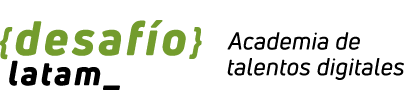

##<font color='green'>Árbol de regresión</font>

###<font color='green'>Construcción</font>



A partir de estos datos, generaremos el árbol de regresión

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Error Cuadrático Medio (MSE): 2711179.5116276774


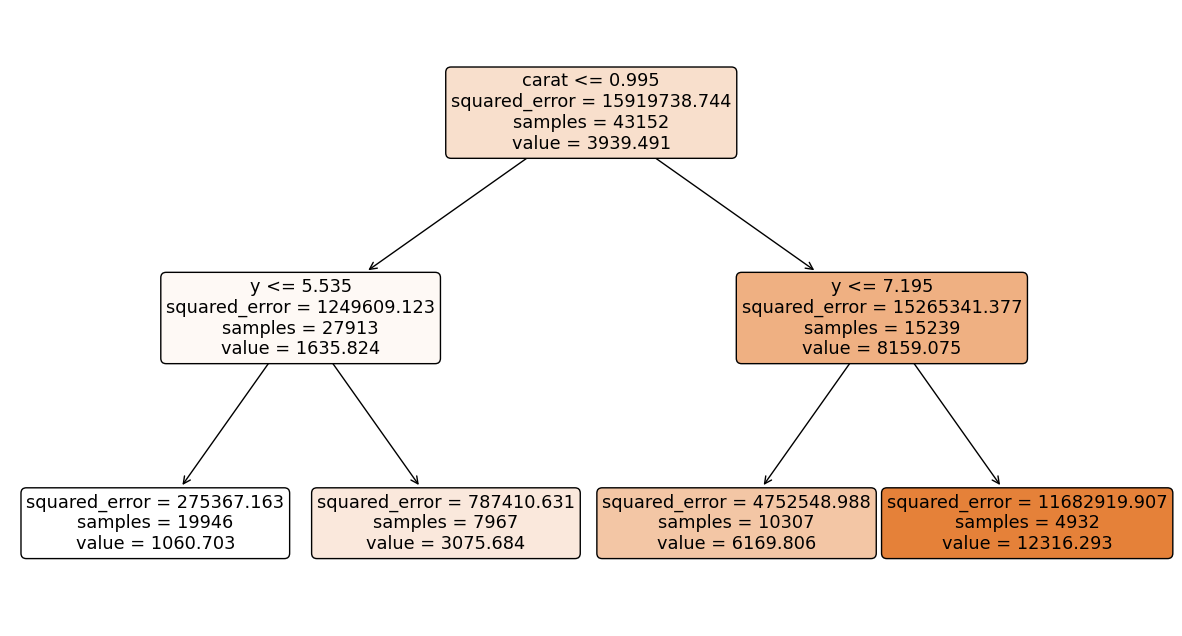

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de Diamonds
diamonds = sns.load_dataset('diamonds')

# Mostrar las primeras filas del conjunto de datos
print(diamonds.head())

# Convertir las variables categóricas a numéricas para poder entrenar el modelo
diamonds = pd.get_dummies(diamonds, drop_first=True)

# Dividir el conjunto de datos en entrenamiento y prueba
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de regresión. Fijamos la profundidad en 2
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg_tree.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Graficar el árbol de regresión
plt.figure(figsize=(15, 8))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()


###<font color='green'>Hiperparámetros</font>

Veremos a continuación el ajuste de los hiperparaámetros

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [7]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

scaler = StandardScaler()
diam = diamonds.drop(['cut', 'color', 'clarity'], axis=1)
diamonds_scaled = pd.DataFrame(scaler.fit_transform(diam), columns = diam.columns)

X = diamonds_scaled.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds_scaled.loc[:, ['price']]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 63)

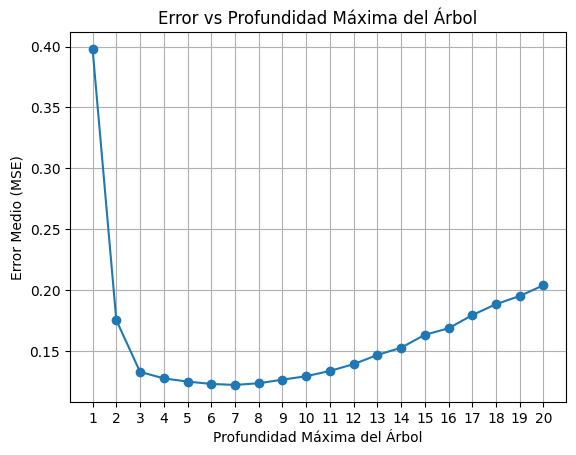

In [8]:
# Inicializamos listas para almacenar los valores del hiperparámetro y los errores
max_depths = list(range(1, 21))
mean_errors = []

# Iterar sobre diferentes valores del hiperparámetro (profundidad máxima del árbol)
for max_depth in max_depths:
    # Crear un modelo de árbol de regresión con el hiperparámetro actual
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)

    # Calcular el error medio utilizando cross validation
    errors = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_error = np.mean(errors)
    mean_errors.append(mean_error)

# Plotear cómo cambia el error a lo largo del hiperparámetro
plt.plot(max_depths, mean_errors, marker='o')
plt.title('Error vs Profundidad Máxima del Árbol')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Error Medio (MSE)')
plt.xticks(max_depths)
plt.grid(True)
plt.show()
